<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Logistic Regression

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
%matplotlib inline

## Intro

### Classification vs. Regression

A regression model predicts the value of a numeric variable. We evaluate it by measuring *how close its predictions are* to ground-truth values.

A classification model predicts the value of a categorical variable. Many classification models provide *probability distributions* over possible values, in addition to a "hard" prediction. We can evaluate classification models by measuring how close those probabilities are to the correct values (0 or 1), but more often we evaluate them according to *how often their (hard) predictions are correct.*

**Exercise (2 mins.)** Slack poll.

/poll “Which of the following are classification (as opposed to regression) problems? (Select all that apply.)” “Predicting how many people will come to a meetup event.” “Predicting which of the people who signed up for a meetup will actually attend.” “Predicting the price that a house will sell for, based on its zip code and square footage.” “Assigning probabilities of experiencing a fire in the next six months to buildings in a city.” “Identifying animals in photographs by species.”

/scrub/

2, 4, 5. 4 is tricky, because it does produce a number. You can think of it as modeling probabilities as numbers, like a regression algorithm. I think that's why logistic regression is called logistic *regression*. But producing probabilities for discrete categories is just a fuzzy way of addressing a classification problem, so we will call algorithms that do so classification algorithms.

$\blacksquare$

### Logistic Regression

Despite its name, logistic regression is a type of classification model. More specifically, it addresses *binary classification* problems, where we are classifying items into either of two categories. We will see that it is a fairly minimal modification of linear regression to adapt it to such problems. 

### Demo

Let's use logistic regression to predict who will survive on the titanic.

In [44]:
titanic = pd.read_csv('../assets/data/titanic.csv')

In [45]:
# To get us started, use just the numeric columns without missing data
titanic = titanic.select_dtypes(['int64', 'float64']).dropna(axis='columns')

In [46]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500


In [47]:
# Split the data into the column `y` we want to predict and the 
# columns `X` we will use to make the predictions
target_col = 'Survived'
X = titanic.drop(target_col, axis='columns')
y = titanic.loc[:, target_col]

In [49]:
# Set aside 25% of the data for testing the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
# Import a model class
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression()

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

/Users/gGandenberger/anaconda3/envs/ga/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
# Score the model on the test data
lr.score(X_test, y_test)

0.7130044843049327

Our model gets the right answer 71% of the time on the test set.

Is that any good? Well, let's see what percent of the passengers survived.

In [10]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

If we guessed "did not survive" every time, we would get 62% accuracy. Our model is doing a bit better than that, so it is getting some signal from our feature variables.

**All that changes in the code when we go from linear to logistic regression is the model class that we import and instantiate and the type of column that we use as our target.**

**Exercise (10 mins., in pairs)**

- Load the dataset at ../assets/data/iris.csv into a Pandas DataFrame called `iris`. This dataset contains measurements of iris petals and sepal leaves (the leaves just below the petal) and a label indicating the iris's species. 

In [11]:
# /scrub/
iris = pd.read_csv('../assets/data/iris.csv')

- Create a new Boolean column "is_virginica" that indicates whether the value of the "species" column is "Iris-virginica"

In [12]:
# /scrub/
iris.loc[:, 'is_virginica'] = (iris.loc[:, 'species'] == 'Iris-virginica').astype('int')

- Create variables `X_train`, `X_test`, `y_train`, `y_test` using a 75/25 train/test split with "is_virginica" as the target variable and the four petal and sepal measurements as the feature columns.

In [13]:
# /scrub/
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'is_virginica'],
      dtype='object')

In [14]:
# /scrub/
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_col = 'is_virginica'
X = iris.loc[:, feature_cols]
y = iris.loc[:, target_col]

In [15]:
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y)

- Use the training set to train a logistic regression model to predict "is_virginica" from the four petal and sepal measurements.

In [16]:
# /scrub/
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/gGandenberger/anaconda3/envs/ga/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

- Calculate the model's accuracy on the test set.

In [17]:
# /scrub/
lr.score(X_test, y_test)

0.9473684210526315

- Compare this score with the best score you could get by guessing "is Virginica" or "is not Virginica" every time.

In [18]:
# /scrub/
y_test.value_counts(normalize=True)

0    0.710526
1    0.289474
Name: is_virginica, dtype: float64

/scrub/

We could get 61% accuracy by guessing "is not Virginica" every time. Our model's accuracy is much higher.

- **BONUS:** Evaluate your model with k-fold cross validation.

- **BONUS:** Try different combinations of features.

$\blacksquare$

## Logistic Regression with One Feature

Being able to identify the source of a shard of glass is valuable for crime scene forensics. Let's build a model to predict whether a sample of glass is "window glass" or "household glass" based on its composition.

In [19]:
# Load glass data
glass_filepath = '../assets/data/glass.csv'
glass = pd.read_csv(glass_filepath)

In [20]:
# change columns to something more uniform
glass.columns = ['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'glass_type']

In [21]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
# Inspect "glass_type"
# /scrub/
glass.loc[:, 'glass_type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Glass types 1-4 are "window glass," and types 4-7 are "household glass."

In [23]:
# Create a "household" column that we can predict with a binary classification model
# /scrub/
glass.loc[:, 'household'] = (glass.loc[:, 'glass_type'] > 4).astype(int)

In [24]:
# Inspect 5 random rows
# /scrub/
glass.sample(5)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
130,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00,2,0
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1,0
139,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00,2,0
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7,1
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2,0


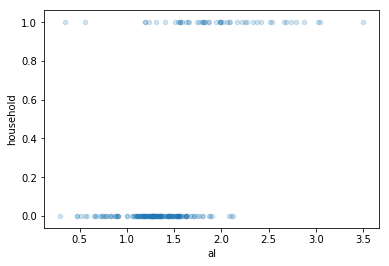

In [25]:
# Make a scatter plot comparing `al` and `household`
# /scrub/
ax = glass.plot(kind='scatter', x='al', y='household', alpha=.2)

Linear regression would find a straight line through these points, but a straight line is not appropriate for a classification problem. We know that the right answer is either zero or one, so it is silly to predict a number that is less than zero or greater than one, as we will have to do for some input if we predict using a straight line that has non-zero slope.

<img src="../assets/images/linear_classification.png" style="height: 200px">

A more appropriate shape would be a sigmoid (kind of a flattened "s" shape):

<img src="../assets/images/logistic_classification.png" style="height: 200px">

That's what logistic regression gives us.

In [26]:
# Split the data into feature columns and target column
# /scrub/
feature_cols = ['al']
target_col = 'household'
X = glass.loc[:, feature_cols]
y = glass.loc[:, target_col]

In [27]:
# Split the data into training rows and test rows
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# Instantiate the model class
# /scrub/
lr = LogisticRegression()

In [29]:
# Train the model on the training set
# /scrub/
lr.fit(X_train, y_train)

/Users/gGandenberger/anaconda3/envs/ga/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
# Evaluate the model on the test set
# /scrub/
lr.score(X_test, y_test)

0.8703703703703703

In [31]:
# Compare to the frequency of the most common class to make sure your accuracy is higher
# /scrub/
y_test.value_counts(normalize=True)

0    0.777778
1    0.222222
Name: household, dtype: float64

In [32]:
# New method: get the model's probabilities for the test data.
# Return value is a 2D array where each row corresponds to an item in the test set
# and each column corresponds to a value of the target variable (0 or 1 in this case).
# /scrub/
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob

array([[0.66778971, 0.33221029],
       [0.77876541, 0.22123459],
       [0.7601375 , 0.2398625 ],
       [0.51259237, 0.48740763],
       [0.92547128, 0.07452872],
       [0.81284322, 0.18715678],
       [0.94071264, 0.05928736],
       [0.85398957, 0.14601043],
       [0.3589473 , 0.6410527 ],
       [0.80195472, 0.19804528],
       [0.79633426, 0.20366574],
       [0.72328933, 0.27671067],
       [0.9006046 , 0.0993954 ],
       [0.83322552, 0.16677448],
       [0.79347984, 0.20652016],
       [0.07792464, 0.92207536],
       [0.80745758, 0.19254242],
       [0.31215976, 0.68784024],
       [0.83077827, 0.16922173],
       [0.81284322, 0.18715678],
       [0.67551207, 0.32448793],
       [0.42133285, 0.57866715],
       [0.48633526, 0.51366474],
       [0.91789363, 0.08210637],
       [0.2620841 , 0.7379159 ],
       [0.81811215, 0.18188785],
       [0.83803498, 0.16196502],
       [0.54312797, 0.45687203],
       [0.88908207, 0.11091793],
       [0.22657353, 0.77342647],
       [0.

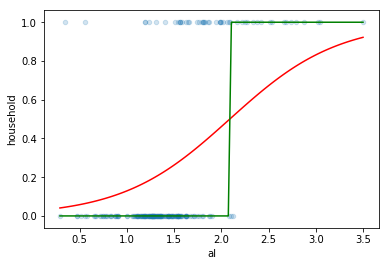

In [33]:
# Plot predictions and predicted probability as a function of our feature
# /scrub/
x_grid = np.linspace(start=glass.loc[:, 'al'].min(), stop=glass.loc[:, 'al'].max(), num=100)
pred_probs = lr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr.predict(x_grid.reshape(-1, 1))
ax = glass.plot(kind='scatter', x='al', y='household', alpha=.2)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

The model predicts "household" exactly when the probability it assigns to household is above .5.

**Exercise (5 mins., in pairs)**

In [34]:
iris = pd.read_csv('../assets/data/iris.csv')

iris.loc[:, 'is_virginica'] = (iris.loc[:, 'species'] == 'Iris-virginica').astype('int')

feature_cols = ['sepal_length']
target_col = 'is_virginica'
X = iris.loc[:, feature_cols]
y = iris.loc[:, target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/gGandenberger/anaconda3/envs/ga/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

- Plot predictions and predicted probability against "sepal_length" for the model above that predicts "is_virginica" from petal_length.

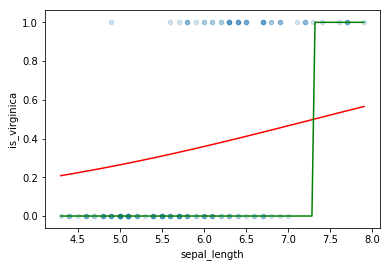

In [35]:
# /scrub/
x_grid = np.linspace(start=iris.loc[:, 'sepal_length'].min(), stop=iris.loc[:, 'sepal_length'].max(), num=100)
pred_probs = lr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr.predict(x_grid.reshape(-1, 1))
ax = iris.plot(kind='scatter', x='sepal_length', y='is_virginica', alpha=.2)
ax.plot(x_grid, pred_probs, c='r');
ax.plot(x_grid, preds, c='g');

- How does this plot look different from the corrsponding plot for the previous model? Why does it look that way?

The predicted probability curve is flatter because the relationship between the feature and the target is weaker.

- **BONUS:** Generate analogous plots for the other features in the iris dataset.

## Logistic Regression With Multiple Features

For logistic regression with two features, we can visualize the *decision boundary* it draws between the two classes in terms of those features.

In [36]:
# Train a logistic regression model to predict whether glass is "household"
# from its aluminum and magnesium content.
# /scrub/
feature_cols = ['al', 'mg']
target_col = 'household'
X = glass.loc[:, feature_cols]
y = glass.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/gGandenberger/anaconda3/envs/ga/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8148148148148148

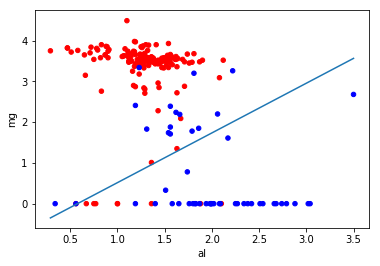

In [37]:
# Plot the points and the model's decision boundary
coefs = lr.coef_[0]
intercept = lr.intercept_

x_values = np.array([X.loc[:, 'al'].min(), X.loc[:, 'al'].max()])
y_values = (-1./coefs[1]) * (coefs[0] * x_values + intercept)
colors = np.where(y == 0, 'r', 'b')

ax = X.plot(kind='scatter', x='al', y='mg', color=colors)
ax.plot(x_values, y_values, label='Decision Boundary')
plt.show()

In this case, the model predicts "household" (blue) for everything below the decision boundary and "not household" (red) for everything above it.

If we do not give the model nonlinear transformations of the input features to work with, then **the logistic regression decision boundary is always a straight line**.

With three features, it is a plane.

In general, it is a "hyperplane."

## Looking Inside the Model

### Modeling Log-Odds

**Linear regression:** *Continuous response* is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots$$

**Logistic regression:** *Log odds* of a binary variable is modeled as a linear combination of the features:

$$\log \left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x + \beta_2 x_2 + \ldots$$

where $p$ is the probability of the "positive" class ("household" in our example).

The log-odds $\log\frac{p}{1-p}$ rescales the probability $p$ to go from $-\infty$ to $\infty$, so that modeling the log-odds with a line that goes off to $\infty$ and $\infty$ is no longer a problem.

In [38]:
# Make a table of log odds in relation to probability
log_odds = pd.DataFrame({'probability': np.linspace(0, 1, 11)})
log_odds.loc[:, 'log odds'] = np.log(log_odds.probability / (1 - log_odds.probability))
log_odds

/Users/gGandenberger/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,probability,log odds
0,0.0,-inf
1,0.1,-2.197225
2,0.2,-1.386294
3,0.3,-0.847298
4,0.4,-0.405465
5,0.5,0.000000
6,0.6,0.405465
7,0.7,0.847298
8,0.8,1.386294
9,0.9,2.197225


Solving for $p$ gives us an expression for the estimated probability $\hat{p}$ in terms of $\beta_0$, $\beta_1$, and $x$:

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

As shown below, the plot of this equation as a function of $x$ has a sigmoid shape. **Changing $\beta_0$ shifts the curve horizontally, while changing $\beta_1$ changes how sharply it rises.**

In [39]:
# Uncomment and run the line below if you do not have bokeh installed
# !conda install -y bokeh

In [41]:
# Make an interactive plot of probability as a function of x,
# with sliders for b0 and b1
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource

x = np.linspace(-10, 10, 500)
y = np.exp(x) / (1 + np.exp(x))

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var b0 = beta0.value;
    var b1 = beta1.value;
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = (
        Math.pow(Math.E, b0 + b1 * x[i]) 
        / (1 + Math.pow(Math.E, b0 + b1 * x[i])));
    }
    source.change.emit();
""")

b0_slider = Slider(start=-10, end=10, value=0, step=.1,
                   title="beta_0", callback=callback)
callback.args['beta0'] = b0_slider

b1_slider = Slider(start=-10, end=10, value=1, step=.1,
                   title="beta_1", callback=callback)
callback.args['beta1'] = b1_slider

layout = row(
    plot,
    column(b0_slider, b1_slider),
)

output_notebook()

show(layout)

Loading BokehJS ...

### Interpreting the Regression Parameters

**Linear regression:**

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots$$

- $\beta_0$ tells you the model's prediction for $y$ when all input features are zero.
- $\beta_1$ tells you how the model's prediction for $y$ changes with a one-unit increase in $x_1$ when all other variables remain the same. (And similarly for $\beta_2$, $\beta_3$, $\ldots$.)

**Logistic regression:**

$$\log \left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x + \beta_2 x_2 + \ldots$$

- $\beta_0$ tells you the model's prediction for the *log odds of $y$* when all input features are zero.
- $\beta_1$ tells you how the model's prediction for *the log odds of* $y$ changes with a one-unit increase in $x_1$ when all other variables remain the same. (And similarly for $\beta_2$, $\beta_3$, $\ldots$.)

**Bottom line:** A positive coefficient means that the predicted log odds of the response (and thus the predicted probability) increases with the associated variable, while a negative coefficient means that it decreases.

![Logistic regression beta values](../assets/images/logistic_betas.png)

## Summary

- Logistic regression addresses a binary classification problem by modeling the *log odds* that an individual is in the class as a linear function of the model features.
- A coefficient in a logistic regression model tells you *how the log odds that the model predicts changes* with a one-unit increase in the associated input feature, while other features remain unchanged.
- The model's log-odds predictions can be transformed into probabilities.
- Those predicted probabilities follow an "s" (sigmoid) shape that is bounded by 0 and 1, as a function of the input features.
- Those predicted probabilities can be converted into "hard" class predictions by mapping everything above a threshold (often .5) to 1 and everything below it to 0.

## Comparing Logistic Regression to Other Models

Advantages of logistic regression:

- Somewhat interpretable.
- Training and prediction are fast.
- Outputs probabilities.
- Features don't need scaling.
- Can perform well with a small number of observations.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.
- Can't automatically learn feature interactions.